
<center>
    <h2>DTH Customer Churn Analysis</h2>
    <h4>IBM Project G22</h4>
    <br>
    <br>
    
</center>
<h3>Exploratory Data Analysis</h3>


#### Table of Contents

 
 1. [Importing Libraries](#1)
 2. [EDA](#3)
 3. [Data Visualization](#4)
 4. [](#5)
 5. [](#6)
 7. [](#7)
 


## <span id="1"></span> ** 1. Importing Libraries **

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')


#### Reading Data

In [2]:
df = pd.read_csv("./../data/dth_data_1.csv")
data_pred = pd.read_csv("./../data/train_data_X_pred_xgb01_70acc.csv")


In [3]:
df.head()

,names,address,city,phone_number,dth_pack,subscription_status,customer_class,ott_subscription,dth_pack_price,no_of_channels,active_since,viewtime,churn
0,Autumn Jackson,"1166 Max Pine,Selenastad, OR 84999",Nicholasview,001-299-668-9887x055,Standard,True,Individual,None,350,400,1245,315,False
1,Tiffany Molina,"2897 Kari Skyway,Thomasside, ID 62645",New Davidtown,986-452-8168x704,HD,True,Individual,None,500,450,164,77,False
2,Andre King,"9308 Williams Islands,Shawnborough, UT 79074",Michaelshire,+1-652-466-9356x692,HD,True,Individual,None,500,450,773,27,True
3,Dale Franco,"989 Elizabeth Isle,Mayport, DC 08154",Lake Margaret,238.412.9721x813,HD,False,Home,Hulu,500,450,0,5632,True
4,Kimberly Taylor,"Unit 8082 Box 6829,DPO AP 84673",Justinbury,530.337.6650x868,Standard,True,Home,Netflix,350,400,814,91,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   names                10000 non-null  object
 1   address              10000 non-null  object
 2   city                 10000 non-null  object
 3   phone_number         10000 non-null  object
 4   dth_pack             10000 non-null  object
 5   subscription_status  10000 non-null  bool  
 6   customer_class       10000 non-null  object
 7   ott_subscription     10000 non-null  object
 8   dth_pack_price       10000 non-null  int64 
 9   no_of_channels       10000 non-null  int64 
 10  active_since         10000 non-null  int64 
 11  viewtime             10000 non-null  int64 
 12  churn                10000 non-null  bool  
dtypes: bool(2), int64(4), object(7)
memory usage: 879.0+ KB


In [5]:
df.describe()

,dth_pack_price,no_of_channels,active_since,viewtime
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,414.530000,419.840000,758.875600,1414.871700
std,111.940306,33.158473,661.192627,2483.106234
min,350.000000,400.000000,0.000000,1.000000
25%,350.000000,400.000000,11.750000,105.000000
50%,350.000000,400.000000,673.500000,304.000000
75%,500.000000,450.000000,1347.000000,775.500000
max,700.000000,500.000000,1999.000000,9996.000000


In [6]:
len(df)  ## 100k data len

10000

In [7]:
df.columns

Index(['names', 'address', 'city', 'phone_number', 'dth_pack',
       'subscription_status', 'customer_class', 'ott_subscription',
       'dth_pack_price', 'no_of_channels', 'active_since', 'viewtime',
       'churn'],
      dtype='object')

In [8]:
col_list = df.columns.to_list()

In [9]:
col_list  ## All columns

['names',
 'address',
 'city',
 'phone_number',
 'dth_pack',
 'subscription_status',
 'customer_class',
 'ott_subscription',
 'dth_pack_price',
 'no_of_channels',
 'active_since',
 'viewtime',
 'churn']

In [10]:
df.isnull().sum()  ## no missing values

names                  0
address                0
city                   0
phone_number           0
dth_pack               0
subscription_status    0
customer_class         0
ott_subscription       0
dth_pack_price         0
no_of_channels         0
active_since           0
viewtime               0
churn                  0
dtype: int64

In [11]:
df.describe()

,dth_pack_price,no_of_channels,active_since,viewtime
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,414.530000,419.840000,758.875600,1414.871700
std,111.940306,33.158473,661.192627,2483.106234
min,350.000000,400.000000,0.000000,1.000000
25%,350.000000,400.000000,11.750000,105.000000
50%,350.000000,400.000000,673.500000,304.000000
75%,500.000000,450.000000,1347.000000,775.500000
max,700.000000,500.000000,1999.000000,9996.000000


In [12]:
cat_cols = [cname for cname in df.columns if (df[cname].dtype=="object" or df[cname].dtype=="bool") and df[cname].nunique()<20]

In [13]:
cat_cols ## categoricals columns

['dth_pack',
 'subscription_status',
 'customer_class',
 'ott_subscription',
 'churn']

In [14]:
num_cols = [cname for cname in df.columns if df[cname].dtype=="int64"]

In [15]:
num_cols  ## numerical columns

['dth_pack_price', 'no_of_channels', 'active_since', 'viewtime']

In [16]:
[names for names in col_list if names not in cat_cols and names not in num_cols]  ## remaining cols

['names', 'address', 'city', 'phone_number']

In [17]:
df[cat_cols] ## only cat cols

,dth_pack,subscription_status,customer_class,ott_subscription,churn
0,Standard,True,Individual,None,False
1,HD,True,Individual,None,False
2,HD,True,Individual,None,True
3,HD,False,Home,Hulu,True
4,Standard,True,Home,Netflix,False
...,...,...,...,...,...
9995,Standard,True,Individual,None,False
9996,Standard,False,Individual,Other,False
9997,UHD,False,Commercial,Hulu,False
9998,HD,True,Home,None,False


In [18]:
df[num_cols]

,dth_pack_price,no_of_channels,active_since,viewtime
0,350,400,1245,315
1,500,450,164,77
2,500,450,773,27
3,500,450,0,5632
4,350,400,814,91
...,...,...,...,...
9995,350,400,1931,842
9996,350,400,0,8299
9997,700,500,0,2635
9998,500,450,1436,627


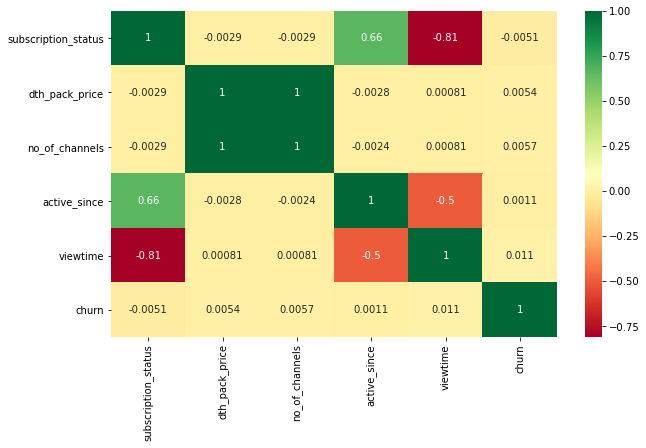

In [19]:
plt.figure(figsize=(10,6))

g=sns.heatmap(df.corr(),cmap="RdYlGn",annot=True)
plt.savefig("corr-heatmap.jpg")

In [20]:
df[cat_cols]

,dth_pack,subscription_status,customer_class,ott_subscription,churn
0,Standard,True,Individual,None,False
1,HD,True,Individual,None,False
2,HD,True,Individual,None,True
3,HD,False,Home,Hulu,True
4,Standard,True,Home,Netflix,False
...,...,...,...,...,...
9995,Standard,True,Individual,None,False
9996,Standard,False,Individual,Other,False
9997,UHD,False,Commercial,Hulu,False
9998,HD,True,Home,None,False


In [21]:
df["dth_pack"].value_counts()

Standard    7034
HD          1964
UHD         1002
Name: dth_pack, dtype: int64

### Categorical columns EDA

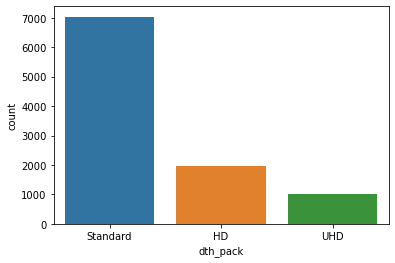

In [22]:
sns.countplot(df["dth_pack"])  ## showing dth pack distribution
plt.savefig("dth-pack.jpg")

True     7506
False    2494
Name: subscription_status, dtype: int64


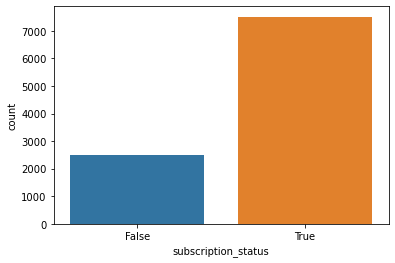

In [23]:
print(df["subscription_status"].value_counts())

sns.countplot(df["subscription_status"])
plt.savefig("subscription_status.jpg")

Individual    6022
Home          2976
Commercial    1002
Name: customer_class, dtype: int64


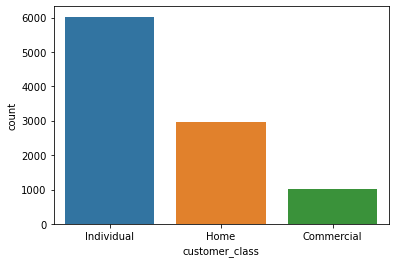

In [24]:
print(df["customer_class"].value_counts())

sns.countplot(df["customer_class"])
plt.savefig("customer_class.jpg")

Netflix               3016
None                  2479
Amazon Prime Video    1949
Other                 1552
Hulu                  1004
Name: ott_subscription, dtype: int64


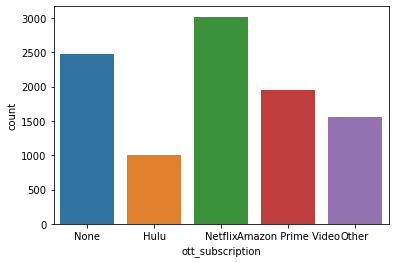

In [25]:
print(df["ott_subscription"].value_counts())

sns.countplot(df["ott_subscription"])
plt.savefig("ott_subscription.jpg")

False    7009
True     2991
Name: churn, dtype: int64


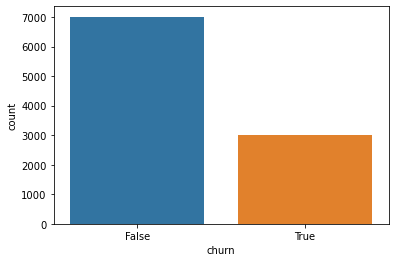

In [26]:
print(df["churn"].value_counts())

sns.countplot(df["churn"])
plt.savefig("churn.jpg")

In [27]:
# group_labels=["distplot"]
# data = df["viewtime"].to_list()
# fig = ff.create_distplot(data,group_labels)
# fig.show()

### Numericals columns EDA


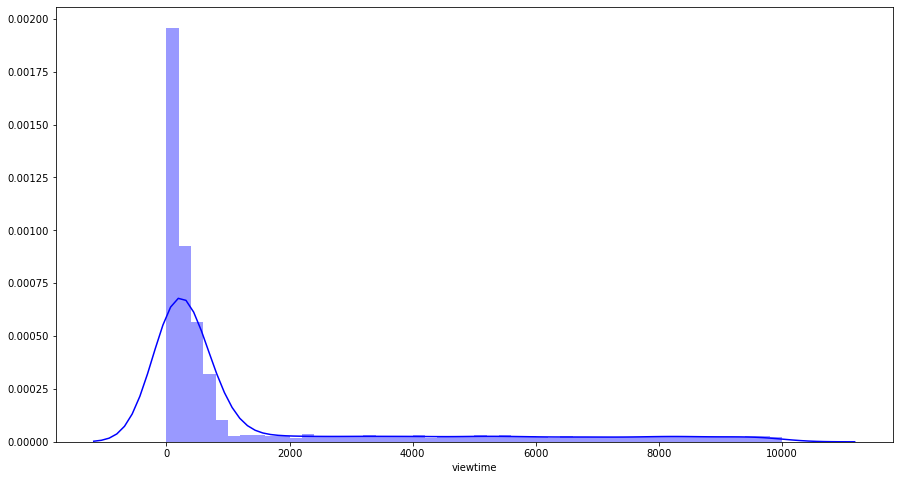

In [28]:
plt.figure(figsize=(15,8))
sns.distplot(df["viewtime"],color="blue")
plt.savefig("viewtime.jpg")

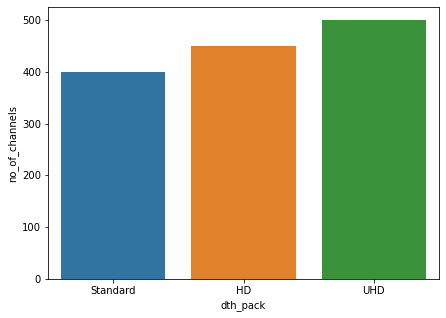

In [29]:
plt.figure(figsize=(7,5))
sns.barplot(x=df["dth_pack"],y=df["no_of_channels"])
plt.savefig("dth-pack vs no_channel.jpg")

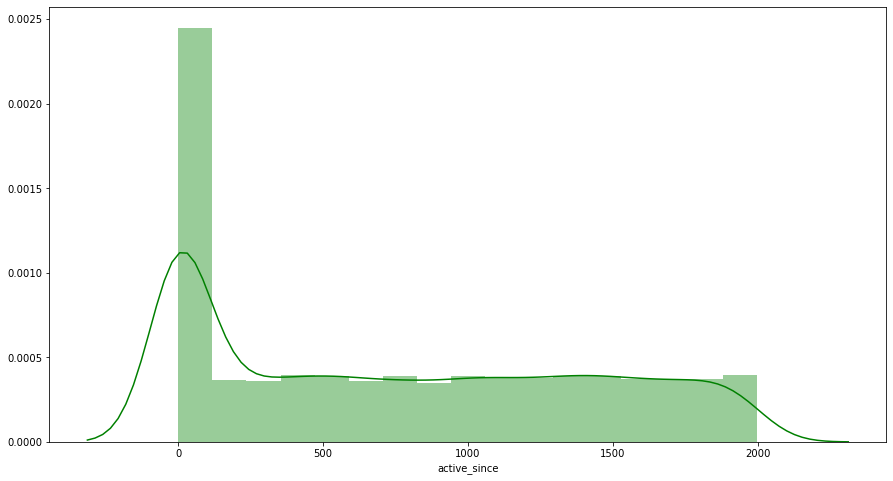

In [30]:
plt.figure(figsize=(15,8))
sns.distplot(df["active_since"],color="green")
plt.savefig("activesince dist.jpg")

In [31]:
print("Mean of Active-since: ",df["active_since"].mean())
print("Median of Active-since: ",df["active_since"].median())

Mean of Active-since:  758.8756
Median of Active-since:  673.5


In [32]:
df[num_cols]

,dth_pack_price,no_of_channels,active_since,viewtime
0,350,400,1245,315
1,500,450,164,77
2,500,450,773,27
3,500,450,0,5632
4,350,400,814,91
...,...,...,...,...
9995,350,400,1931,842
9996,350,400,0,8299
9997,700,500,0,2635
9998,500,450,1436,627


In [33]:
df[cat_cols]

,dth_pack,subscription_status,customer_class,ott_subscription,churn
0,Standard,True,Individual,None,False
1,HD,True,Individual,None,False
2,HD,True,Individual,None,True
3,HD,False,Home,Hulu,True
4,Standard,True,Home,Netflix,False
...,...,...,...,...,...
9995,Standard,True,Individual,None,False
9996,Standard,False,Individual,Other,False
9997,UHD,False,Commercial,Hulu,False
9998,HD,True,Home,None,False


In [34]:
# dth_pack_true=df[df["subscription_status"]==True].dth_pack
# dth_pack_true

In [35]:
"""
tasks:

1) show distribution of inactive subscription and ott subscription
2) show dist of dth pack and customer class

4) churn==True of inactive subs with active ott subscription

5) redefine: meaning of sub status = False with churn = True

6) customer class with distribution of ott subscription and dth_pack

7) viewtime vs active ott_subscription



## done

3)compare show most popular ott subsription dth pack
8) price the customer pays having active ott_sub


"""

'\ntasks:\n\n1) show distribution of inactive subscription and ott subscription\n2) show dist of dth pack and customer class\n\n4) churn==True of inactive subs with active ott subscription\n\n5) redefine: meaning of sub status = False with churn = True\n\n6) customer class with distribution of ott subscription and dth_pack\n\n7) viewtime vs active ott_subscription\n\n\n\n## done\n\n3)compare show most popular ott subsription dth pack\n8) price the customer pays having active ott_sub\n\n\n'

In [36]:
# dth_pack_inactive = df[df["subscription_status"]==False]

In [37]:
# fig = px.bar(x=df["ott_subscription"],y=df["subscription_status"],color=df["subscription_status"])
# fig.show()

In [38]:
# g=sns.FacetGrid(df,col="ott_subscription",height=5,aspect=.5)
# g.map(sns.barplot,"subscription_status","dth_pack")


In [39]:
# for p in g.patches:
#     g.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    size=15,
#                    xytext = (0, -12), 
#                    textcoords = 'offset points')
# plt.xlabel("Continent", size=14)
# plt.ylabel("LifeExp", size=14)
# plt.savefig("add_annotation_to_bars_in_barplot_Seaborn_Python.png")

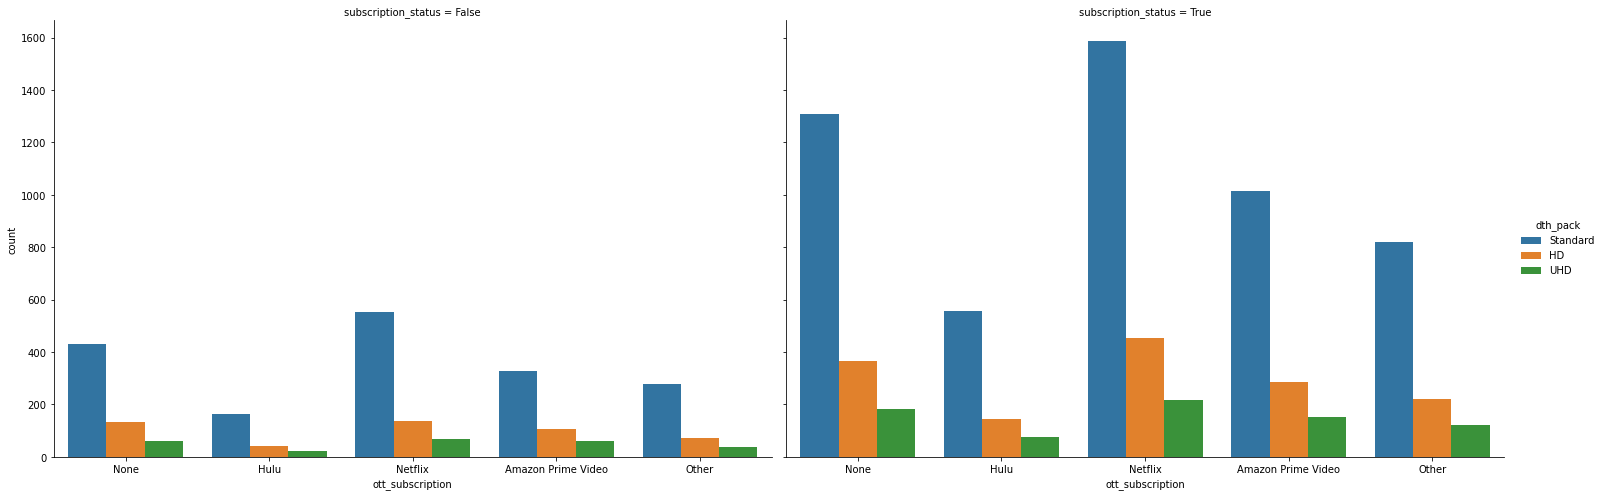

In [40]:
# 3)compare show most popular ott subsription dth pack

g = sns.catplot(x="ott_subscription",hue="dth_pack",col ="subscription_status",data = df,kind="count",height=7,aspect=1.5)
g.savefig("ott_vs_dth_pack.jpg")

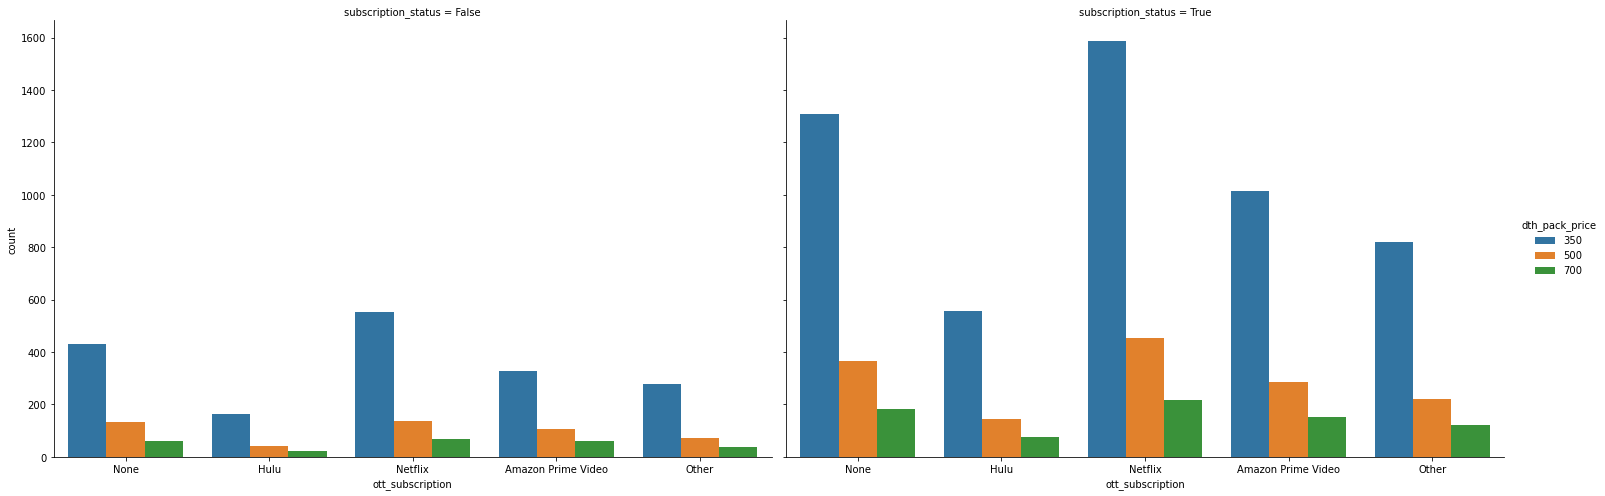

In [41]:
## strong correlation between dth_price and pack so charts are almost similiar
g = sns.catplot(x="ott_subscription",hue="dth_pack_price",col ="subscription_status",data = df,kind="count",height=7,aspect=1.5)
g.savefig("ott_vs_dth_pack_price.jpg")

In [42]:
# active customer

len(df[df["subscription_status"]==1])

7506

In [43]:
#total customers

len(df)

10000

In [44]:
## churn rate
churn_true = len(df[df["churn"]==1])

churn_rate = (churn_true / len(df))*100
churn_rate

29.909999999999997

In [45]:
## expected monthly revenue

expected_monthly_revenue = df[df["subscription_status"]==1]["dth_pack_price"].sum()
expected_monthly_revenue

3110050

In [46]:
pred_churn_list = data_pred["pred_churn"].value_counts().to_list()

In [47]:
pred_churn_list[1] / (pred_churn_list[0]+pred_churn_list[1])

0.0098

In [48]:
pred_churn_list[1]

98

In [49]:
temp = pd.DataFrame(df['churn'])
temp

,churn
0,False
1,False
2,True
3,True
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [64]:
assert data_pred.empty == False